# Playing with pyannote.audio

> "Doesn't detect music"

- toc: false
- branch: master
- hidden: true
- categories: [diarisation, pyannote]

Only the `dia` pipeline seems to work.

In [ ]:
%%capture
!pip install -q pyannote.audio==1.1

In [ ]:
%%capture
!wget https://podcast.rasset.ie/podcasts/audio/2021/0626/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.mp3

In [ ]:
%%capture
!ffmpeg -i /content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.mp3 -acodec pcm_s16le -ac 1 -ar 16000 /content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.wav

In [ ]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline({'audio': '/content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.wav'})

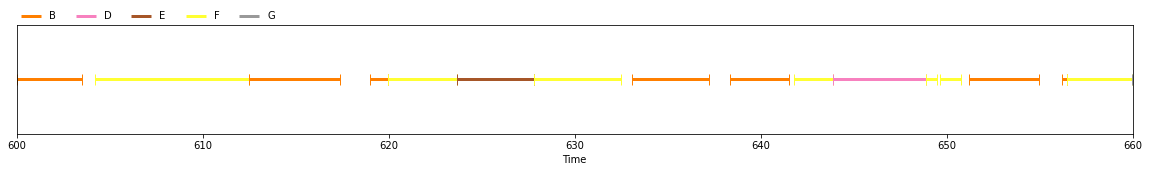

In [ ]:
diarization

In [ ]:
with open('/content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.rttm', 'w') as f:
    diarization.write_rttm(f)

In [ ]:
%%capture
!pip install youtube-dl

In [ ]:
%%capture
!youtube-dl f3wKxcP7hYE

In [ ]:
%%capture
!ffmpeg -i 'Sraith 2 Eip 1-f3wKxcP7hYE.mp4' -acodec pcm_s16le -ac 1 -ar 16000 f3wKxcP7hYE.wav

In [ ]:
diarization2 = pipeline({'audio': '/content/f3wKxcP7hYE.wav'})

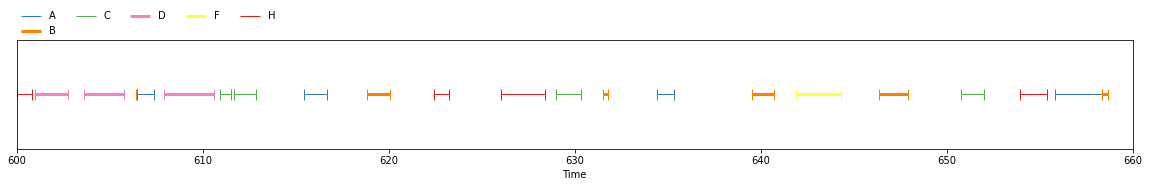

In [ ]:
diarization2

No good; first 8 seconds are silence (ok), next 30 are theme music (not ok).

In [ ]:
with open('/content/f3wKxcP7hYE.rttm', 'w') as f2:
    diarization2.write_rttm(f2)